# Importación y estructuración final de los datos

In [61]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import tensorflow as tf
import seaborn as sns
import statsmodels

In [62]:
#importamos los datos del bucket silver
df1 = pd.read_csv("/content/drive/MyDrive/base de datos/silver/ESP_PIB_real_miles_millones_euros_2005_trimestral_1960Q1_2022Q4.csv", sep = ";")
df2 = pd.read_csv("/content/drive/MyDrive/base de datos/silver/indicadores_indice_trimestral_01-1968_02-2023.csv", sep = ";")
df3 = pd.read_csv("/content/drive/MyDrive/base de datos/silver/indicadores_sinteticos_indice_base=2015_trimestral_1995Q1_2022Q4.csv", sep = ";")
df4 = pd.read_csv("/content/drive/MyDrive/base de datos/silver/indicadores_varios_trimestral_1993Q1_2022Q4.csv", sep = ";") 
df5 = pd.read_csv("/content/drive/MyDrive/base de datos/silver/tipos_interes_cambio_euro_trimestral_1978Q4_2023Q4.csv", sep = ";")

In [63]:
df1.head()

,trimestre,pib.real
0,1960Q1,NaN
1,1960Q2,NaN
2,1960Q3,NaN
3,1960Q4,NaN
4,1961Q1,NaN


In [64]:
df2.head()

,trimestre,ipc.general,ipri.sin.energia,ipri.energia,precios.agricultores,export,export.sin.energia,export.energia,import,import.sin.energia,import.energia,saldo.corriente.capital,vna-vnp.cuenta.financiera,saldo.caja,financiacion.empresas.resid,financiacion.familias.isfl
0,1968Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.738926e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1968Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.774197e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1968Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.488860e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.080520e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1969Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.052215e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df3.head()

,trimestre,is.act.industria,is.inv.construccion,is.inv.vivienda,is.act.construccion,is.servicios,is.exportaciones,is.importaciones,is.consumo,is.equipo,is.actividad
0,1995Q1,86.792295,126.658609,99.939330,138.185000,60.666858,38.787871,42.739315,72.147250,53.057437,66.705670
1,1995Q2,86.670238,127.478205,101.314161,138.921000,61.417712,39.302666,42.563947,72.823474,54.191333,67.146963
2,1995Q3,86.049729,126.680660,101.019820,138.746667,61.487562,39.086376,43.060987,72.181453,54.346590,67.238323
3,1995Q4,85.758057,127.549875,102.434202,137.240333,62.146947,39.420025,43.159541,72.815522,54.257237,67.077150
4,1996Q1,84.966158,128.341683,103.248117,136.217000,61.385972,39.474068,43.511456,72.709194,54.359723,67.110450


In [66]:
df4.head()

,trimestre,desempleo,precios.vivienda,coste.mensual.trabajador,inv.activos.externos
0,1993Q1,NaN,NaN,NaN,131703.0
1,1993Q2,NaN,NaN,NaN,162509.0
2,1993Q3,NaN,NaN,NaN,174423.0
3,1993Q4,NaN,NaN,NaN,196385.0
4,1994Q1,NaN,NaN,NaN,189623.0


In [67]:
df5.head()

,trimestre,interes.bce,cambio.dolar.euro,cambio.yen.euro,cambio.libra.euro,cambio.yuan.euro
0,1978Q4,NaN,1.377300,265.785000,0.676195,NaN
1,1979Q1,NaN,1.359942,283.079844,0.662271,NaN
2,1979Q2,NaN,1.347771,294.556515,0.641936,NaN
3,1979Q3,NaN,1.381322,300.901231,0.634123,NaN
4,1979Q4,NaN,1.392238,322.784242,0.647762,NaN


In [68]:
#como todos tienen la variable temporal trimestre, podemos agrupar todas las tablas
# en una única por medio de esa columna.
#de esta forma vamos restringiendo el periodo a la tabla de datos con el rango más
#pequeño. También llevamos el ipc.general que será nuestra variable a predecir al final
df = df1.merge(df2, on = "trimestre").merge(df3, on = "trimestre").merge(
    df4, on = "trimestre").merge(df5, on = "trimestre")
s = df["ipc.general"]
df = df.drop("ipc.general", axis = 1)
df["ipc.general"] = s
df.head()

,trimestre,pib.real,ipri.sin.energia,ipri.energia,precios.agricultores,export,export.sin.energia,export.energia,import,import.sin.energia,...,desempleo,precios.vivienda,coste.mensual.trabajador,inv.activos.externos,interes.bce,cambio.dolar.euro,cambio.yen.euro,cambio.libra.euro,cambio.yuan.euro,ipc.general
0,1995Q1,177.507,69.048667,48.703000,NaN,6.672408e+06,6.355205e+06,317203.294933,8.115879e+06,6.460787e+06,...,NaN,NaN,NaN,195720.0,8.500083,1.290588,122.103692,0.813827,NaN,NaN
1,1995Q2,178.608,70.216000,48.566333,NaN,6.550980e+06,6.305580e+06,245400.119333,8.622833e+06,7.185692e+06,...,NaN,NaN,NaN,197248.0,8.825600,1.320769,116.378769,0.830870,NaN,NaN
2,1995Q3,179.329,70.716667,47.904000,NaN,5.787170e+06,5.564882e+06,222287.591200,7.907678e+06,6.255288e+06,...,NaN,NaN,NaN,206583.0,9.250000,1.308269,123.894154,0.831386,NaN,NaN
3,1995Q4,180.692,70.633000,48.155000,NaN,7.001268e+06,6.780599e+06,220669.253367,8.778425e+06,7.101151e+06,...,NaN,NaN,NaN,217066.0,9.031250,1.313343,129.143231,0.839637,NaN,NaN
4,1996Q1,181.760,71.244667,49.067667,NaN,6.932696e+06,6.524690e+06,408005.265567,8.405722e+06,6.707116e+06,...,NaN,NaN,NaN,220585.0,7.925250,1.279702,136.619077,0.831911,NaN,NaN


In [69]:
df.loc[df["trimestre"] == "2002Q1",:]

,trimestre,pib.real,ipri.sin.energia,ipri.energia,precios.agricultores,export,export.sin.energia,export.energia,import,import.sin.energia,...,desempleo,precios.vivienda,coste.mensual.trabajador,inv.activos.externos,interes.bce,cambio.dolar.euro,cambio.yen.euro,cambio.libra.euro,cambio.yuan.euro,ipc.general
28,2002Q1,231.059,77.082333,55.389667,NaN,10959769.4,10697732.73,262036.673933,1.432882e+07,1.217276e+07,...,2152.8,NaN,1837.27,690501.0,3.301538,0.900831,116.8425,0.618952,7.456178,69.761667


In [70]:
#limitamos el rango a 2002Q1 en adelante que fue cuando comenzó a circular el euro
#y renumeramos el indice
df = df.loc[28:,:]
df = df.set_index(df["trimestre"])
df = df.drop("trimestre", axis = 1)

In [71]:
df.tail()

,pib.real,ipri.sin.energia,ipri.energia,precios.agricultores,export,export.sin.energia,export.energia,import,import.sin.energia,import.energia,...,desempleo,precios.vivienda,coste.mensual.trabajador,inv.activos.externos,interes.bce,cambio.dolar.euro,cambio.yen.euro,cambio.libra.euro,cambio.yuan.euro,ipc.general
trimestre,,,,,,,,,,,,,,,,,,,,,
2021Q4,289.105,114.355000,173.129333,116.320000,2.255579e+07,2.125148e+07,1.304310e+06,2.538076e+07,2.212705e+07,3.253705e+06,...,3103.8,135.291,2874.61,2552946.0,0.000000,1.158689,130.076000,0.851297,7.427828,103.042667
2022Q1,289.079,119.637333,213.522333,121.073333,2.188207e+07,2.060863e+07,1.273440e+06,2.497109e+07,2.168408e+07,3.287010e+06,...,3174.7,138.742,2729.01,2595721.0,0.221774,1.095163,133.228413,0.841121,7.098994,105.178667
2022Q2,295.548,126.364667,239.995333,131.590000,2.353729e+07,2.233311e+07,1.204174e+06,2.700044e+07,2.328718e+07,3.713259e+06,...,2919.4,141.433,2871.64,2609446.0,0.180769,1.058489,138.094462,0.849854,7.039437,108.634667
2022Q3,296.094,127.369000,265.445333,133.046667,2.182055e+07,2.034534e+07,1.475210e+06,2.510693e+07,2.171948e+07,3.387444e+06,...,2980.2,143.860,2754.75,2663685.0,0.623134,1.023055,138.955075,0.856125,6.970007,109.916333
2022Q4,296.653,128.263000,236.830000,146.993333,2.286477e+07,2.164065e+07,1.224123e+06,2.503410e+07,2.188779e+07,3.146314e+06,...,3024.0,142.666,2996.63,2639185.0,1.342308,1.038915,141.646462,0.863178,7.211462,109.833000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 2002Q1 to 2022Q4
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pib.real                     84 non-null     float64
 1   ipri.sin.energia             84 non-null     float64
 2   ipri.energia                 84 non-null     float64
 3   precios.agricultores         32 non-null     float64
 4   export                       84 non-null     float64
 5   export.sin.energia           84 non-null     float64
 6   export.energia               84 non-null     float64
 7   import                       84 non-null     float64
 8   import.sin.energia           84 non-null     float64
 9   import.energia               84 non-null     float64
 10  saldo.corriente.capital      84 non-null     float64
 11  vna-vnp.cuenta.financiera    84 non-null     float64
 12  saldo.caja                   84 non-null     float64
 13  financiacion.empre

In [73]:
#eliminamos precios de la vivienda y precios agricultores para tener todas las variables del mismo tamaño
df = df.drop(["precios.vivienda", "precios.agricultores"], axis = 1)
df

,pib.real,ipri.sin.energia,ipri.energia,export,export.sin.energia,export.energia,import,import.sin.energia,import.energia,saldo.corriente.capital,...,is.actividad,desempleo,coste.mensual.trabajador,inv.activos.externos,interes.bce,cambio.dolar.euro,cambio.yen.euro,cambio.libra.euro,cambio.yuan.euro,ipc.general
trimestre,,,,,,,,,,,,,,,,,,,,,
2002Q1,231.059,77.082333,55.389667,1.095977e+07,1.069773e+07,2.620367e+05,1.432882e+07,1.217276e+07,2.156057e+06,-2729.666667,...,84.359330,2152.8,1837.27,690501.0,3.301538,0.900831,116.842500,0.618952,7.456178,69.761667
2002Q2,232.942,77.610333,56.690667,1.162793e+07,1.127935e+07,3.485723e+05,1.512257e+07,1.296433e+07,2.158237e+06,-1529.333333,...,84.724010,2103.3,1907.50,690567.0,3.313846,0.932426,117.097273,0.629625,7.717688,71.289667
2002Q3,234.378,77.694000,56.691000,1.058421e+07,1.020199e+07,3.822174e+05,1.459631e+07,1.245735e+07,2.138959e+06,-1140.000000,...,85.601577,2196.0,1888.12,692472.0,3.299231,0.966328,117.578438,0.632079,7.998295,71.106000
2002Q4,236.161,77.582667,57.489333,1.223008e+07,1.181801e+07,4.120692e+05,1.704418e+07,1.476065e+07,2.283527e+06,-1608.000000,...,86.209627,2232.4,2052.20,708213.0,3.190714,0.980136,120.659104,0.633992,8.112587,72.212000
2003Q1,238.359,78.277333,60.023000,1.187964e+07,1.144758e+07,4.320593e+05,1.533962e+07,1.315284e+07,2.186787e+06,-2972.666667,...,86.947360,2328.5,1940.05,727884.0,2.547692,1.092229,128.657727,0.678433,9.040379,72.380000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021Q4,289.105,114.355000,173.129333,2.255579e+07,2.125148e+07,1.304310e+06,2.538076e+07,2.212705e+07,3.253705e+06,3457.000000,...,112.186213,3103.8,2874.61,2552946.0,0.000000,1.158689,130.076000,0.851297,7.427828,103.042667
2022Q1,289.079,119.637333,213.522333,2.188207e+07,2.060863e+07,1.273440e+06,2.497109e+07,2.168408e+07,3.287010e+06,-940.666667,...,112.857197,3174.7,2729.01,2595721.0,0.221774,1.095163,133.228413,0.841121,7.098994,105.178667
2022Q2,295.548,126.364667,239.995333,2.353729e+07,2.233311e+07,1.204174e+06,2.700044e+07,2.328718e+07,3.713259e+06,1491.333333,...,115.685210,2919.4,2871.64,2609446.0,0.180769,1.058489,138.094462,0.849854,7.039437,108.634667


In [74]:
df.isnull().sum()

pib.real                       0
ipri.sin.energia               0
ipri.energia                   0
export                         0
export.sin.energia             0
export.energia                 0
import                         0
import.sin.energia             0
import.energia                 0
saldo.corriente.capital        0
vna-vnp.cuenta.financiera      0
saldo.caja                     0
financiacion.empresas.resid    0
financiacion.familias.isfl     0
is.act.industria               0
is.inv.construccion            0
is.inv.vivienda                0
is.act.construccion            0
is.servicios                   0
is.exportaciones               0
is.importaciones               0
is.consumo                     0
is.equipo                      0
is.actividad                   0
desempleo                      0
coste.mensual.trabajador       0
inv.activos.externos           0
interes.bce                    0
cambio.dolar.euro              0
cambio.yen.euro                0
cambio.lib

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 2002Q1 to 2022Q4
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pib.real                     84 non-null     float64
 1   ipri.sin.energia             84 non-null     float64
 2   ipri.energia                 84 non-null     float64
 3   export                       84 non-null     float64
 4   export.sin.energia           84 non-null     float64
 5   export.energia               84 non-null     float64
 6   import                       84 non-null     float64
 7   import.sin.energia           84 non-null     float64
 8   import.energia               84 non-null     float64
 9   saldo.corriente.capital      84 non-null     float64
 10  vna-vnp.cuenta.financiera    84 non-null     float64
 11  saldo.caja                   84 non-null     float64
 12  financiacion.empresas.resid  84 non-null     float64
 13  financiacion.famil

# Análisis exploratorio de los datos y visualizaciones

In [76]:
df.describe()

,pib.real,ipri.sin.energia,ipri.energia,export,export.sin.energia,export.energia,import,import.sin.energia,import.energia,saldo.corriente.capital,...,is.actividad,desempleo,coste.mensual.trabajador,inv.activos.externos,interes.bce,cambio.dolar.euro,cambio.yen.euro,cambio.libra.euro,cambio.yuan.euro,ipc.general
count,84.000000,84.000000,84.000000,8.400000e+01,8.400000e+01,8.400000e+01,8.400000e+01,8.400000e+01,8.400000e+01,84.000000,...,84.000000,84.000000,84.000000,8.400000e+01,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,268.937476,96.392147,97.388294,1.686567e+07,1.614104e+07,7.246363e+05,2.076255e+07,1.796051e+07,2.802036e+06,-1003.583333,...,98.723725,3634.917857,2443.355595,1.572961e+06,1.250669,1.225837,130.182094,0.795984,8.589409,89.239198
std,17.299614,11.015196,38.138602,3.661297e+06,3.453907e+06,2.440872e+05,2.812011e+06,2.605258e+06,3.430474e+05,3881.699194,...,7.710442,1353.714644,251.040825,5.210829e+05,1.349793,0.132666,13.642665,0.086879,1.148576,9.413578
min,231.059000,77.082333,55.389667,1.058421e+07,1.020199e+07,2.620367e+05,1.432882e+07,1.217276e+07,1.801526e+06,-10406.000000,...,84.359330,1766.900000,1837.270000,6.905010e+05,0.000000,0.900831,99.657188,0.618952,6.903019,69.761667
25%,257.933250,90.188417,75.953000,1.360931e+07,1.304522e+07,5.367768e+05,1.870464e+07,1.587901e+07,2.652869e+06,-3252.333333,...,93.721639,2247.575000,2318.325000,1.377312e+06,0.003571,1.116559,121.255081,0.696477,7.720674,82.518583
50%,269.571500,99.250333,94.376000,1.677498e+07,1.595450e+07,6.723263e+05,2.051073e+07,1.761747e+07,2.833496e+06,-894.666667,...,97.246195,3453.400000,2481.630000,1.455329e+06,0.961538,1.217997,130.285149,0.835296,8.162625,92.159833
75%,280.842750,102.060917,106.332917,2.019420e+07,1.919167e+07,8.565575e+05,2.303673e+07,2.025053e+07,3.006573e+06,2761.833333,...,102.981214,4721.525000,2600.345000,1.897159e+06,2.088448,1.329801,136.147965,0.867170,9.697272,95.166167
max,299.494000,128.263000,265.445333,2.353729e+07,2.233311e+07,1.475210e+06,2.700044e+07,2.328718e+07,3.713259e+06,4502.666667,...,116.542737,6278.200000,2996.630000,2.663685e+06,4.359286,1.525937,162.638182,0.905317,10.630741,109.916333


In [77]:
df.corr()

,pib.real,ipri.sin.energia,ipri.energia,export,export.sin.energia,export.energia,import,import.sin.energia,import.energia,saldo.corriente.capital,...,is.actividad,desempleo,coste.mensual.trabajador,inv.activos.externos,interes.bce,cambio.dolar.euro,cambio.yen.euro,cambio.libra.euro,cambio.yuan.euro,ipc.general
pib.real,1.000000,0.718848,0.556765,0.716061,0.711008,0.679905,0.896869,0.873098,0.721061,0.241171,...,0.938806,0.040365,0.718708,0.770958,-0.358792,0.039448,0.171168,0.595785,-0.287207,0.721043
ipri.sin.energia,0.718848,1.000000,0.892691,0.877413,0.868917,0.865721,0.754257,0.734806,0.602310,0.570865,...,0.805546,0.419789,0.894315,0.933271,-0.640509,-0.107800,-0.089348,0.729711,-0.647289,0.980428
ipri.energia,0.556765,0.892691,1.000000,0.678868,0.662208,0.812538,0.596743,0.563104,0.615123,0.437346,...,0.686545,0.265033,0.711122,0.740260,-0.435343,-0.169890,-0.019426,0.488336,-0.534372,0.811162
export,0.716061,0.877413,0.678868,1.000000,0.999345,0.858924,0.835080,0.839518,0.469595,0.733772,...,0.831668,0.391242,0.830266,0.897846,-0.774930,-0.291391,-0.158723,0.672758,-0.746871,0.915518
export.sin.energia,0.711008,0.868917,0.662208,0.999345,1.000000,0.839828,0.833117,0.839028,0.457225,0.731745,...,0.824450,0.396998,0.826958,0.892751,-0.776784,-0.291938,-0.162336,0.670074,-0.748732,0.909374
export.energia,0.679905,0.865721,0.812538,0.858924,0.839828,1.000000,0.737303,0.720229,0.574031,0.652145,...,0.808764,0.250971,0.752249,0.834945,-0.632183,-0.239839,-0.083726,0.609586,-0.608249,0.864808
import,0.896869,0.754257,0.596743,0.835080,0.833117,0.737303,1.000000,0.994886,0.641536,0.322434,...,0.944026,0.010077,0.723657,0.819081,-0.421153,-0.095446,0.258821,0.472316,-0.373361,0.756470
import.sin.energia,0.873098,0.734806,0.563104,0.839518,0.839028,0.720229,0.994886,1.000000,0.560774,0.339572,...,0.933600,-0.020041,0.705882,0.824419,-0.432902,-0.144511,0.246809,0.456142,-0.387463,0.740972
import.energia,0.721061,0.602310,0.615123,0.469595,0.457225,0.574031,0.641536,0.560774,1.000000,0.064174,...,0.648140,0.234805,0.571139,0.453111,-0.164595,0.315097,0.247216,0.407491,-0.117928,0.573626
saldo.corriente.capital,0.241171,0.570865,0.437346,0.733772,0.731745,0.652145,0.322434,0.339572,0.064174,1.000000,...,0.403777,0.545340,0.532462,0.546714,-0.845360,-0.505893,-0.482949,0.505122,-0.853767,0.641159


array([[1.        , 0.89625016],
       [0.89625016, 1.        ]])

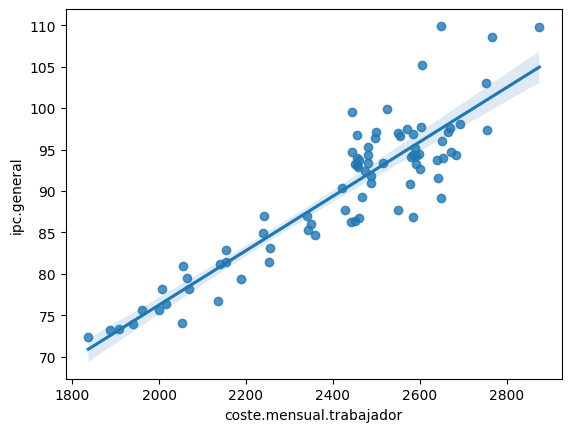

In [78]:
sns.regplot(x = df["coste.mensual.trabajador"].shift(4), y = df["ipc.general"])
np.corrcoef(np.asarray(df["coste.mensual.trabajador"].shift(1)[1:]), np.asarray(df["ipc.general"])[1:])

<Axes: xlabel='trimestre', ylabel='ipc.general'>

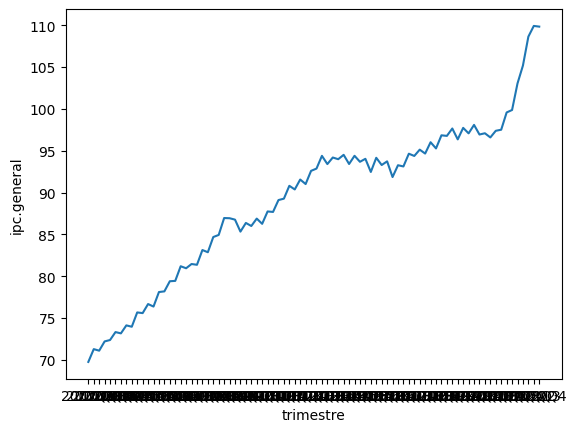

In [79]:
sns.lineplot(df["ipc.general"])

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 2002Q1 to 2022Q4
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pib.real                     84 non-null     float64
 1   ipri.sin.energia             84 non-null     float64
 2   ipri.energia                 84 non-null     float64
 3   export                       84 non-null     float64
 4   export.sin.energia           84 non-null     float64
 5   export.energia               84 non-null     float64
 6   import                       84 non-null     float64
 7   import.sin.energia           84 non-null     float64
 8   import.energia               84 non-null     float64
 9   saldo.corriente.capital      84 non-null     float64
 10  vna-vnp.cuenta.financiera    84 non-null     float64
 11  saldo.caja                   84 non-null     float64
 12  financiacion.empresas.resid  84 non-null     float64
 13  financiacion.famil

# División de los datos en muestra de entrenamiento y muestra de prueba

para evitar la estacionalidad, x es 1 año, desde 1Q1 hasta 1Q4 y y es 1 año

In [81]:
#Definimos una función para dividir la muestra en un data frame muestra de entrenamiento y 
#muestra de prueba
def div_dataframe(df, ult_trimestre_train, primer_trimestre_test):
  df_train = df.loc[:ult_trimestre_train,:]
  df_test = df.loc[primer_trimestre_test:,:]

  return df_train, df_test

In [82]:
#para elegir el tamaño de la muestra, que debe ser de tamaño 16, 20, 24... (3 + 1 año)
# y empezar siempre en un Q1
df.tail(24)

,pib.real,ipri.sin.energia,ipri.energia,export,export.sin.energia,export.energia,import,import.sin.energia,import.energia,saldo.corriente.capital,...,is.actividad,desempleo,coste.mensual.trabajador,inv.activos.externos,interes.bce,cambio.dolar.euro,cambio.yen.euro,cambio.libra.euro,cambio.yuan.euro,ipc.general
trimestre,,,,,,,,,,,,,,,,,,,,,
2017Q1,282.162,101.433333,100.936000,2.142323e+07,2.057646e+07,8.467685e+05,2.392525e+07,2.071846e+07,3.206783e+06,601.333333,...,105.200107,4255.0,2481.75,1877603.0,0.000000,1.087722,122.887231,0.864338,7.442165,94.375667
2017Q2,285.062,101.930333,95.580333,2.200657e+07,2.100437e+07,1.002197e+06,2.389995e+07,2.089472e+07,3.005225e+06,4046.666667,...,106.182703,3914.3,2584.58,1870684.0,0.000000,1.115048,124.357231,0.868343,7.598145,95.129667
2017Q3,286.581,102.006667,95.653667,1.978703e+07,1.886969e+07,9.173393e+05,2.288425e+07,1.986839e+07,3.015856e+06,3880.000000,...,106.874550,3731.7,2454.27,1888879.0,0.000000,1.156525,128.878769,0.889157,7.748278,94.662333
2017Q4,288.558,102.223667,101.392333,2.164022e+07,2.052440e+07,1.115822e+06,2.411864e+07,2.103622e+07,3.082419e+06,3156.333333,...,107.748807,3766.7,2668.84,1921999.0,0.000000,1.158526,130.551692,0.883752,7.721669,96.015667
2018Q1,290.332,102.862000,100.573333,2.134709e+07,2.043445e+07,9.126469e+05,2.401859e+07,2.087365e+07,3.144938e+06,375.333333,...,108.435343,3796.1,2497.91,1952111.0,0.000000,1.214958,132.145781,0.882449,7.816509,95.275667
2018Q2,291.843,103.098000,103.926667,2.213406e+07,2.120045e+07,9.336028e+05,2.490931e+07,2.196291e+07,2.946400e+06,3213.666667,...,108.724487,3490.1,2602.01,1991312.0,0.000000,1.184202,130.133333,0.879557,7.669170,96.843667
2018Q3,293.625,103.141333,110.756333,1.988573e+07,1.886419e+07,1.021538e+06,2.275701e+07,1.971576e+07,3.041247e+06,2845.333333,...,109.040207,3326.0,2499.87,2023672.0,0.000000,1.171334,130.200000,0.889460,7.884660,96.774667
2018Q4,295.252,103.039000,109.818667,2.137960e+07,2.029796e+07,1.081644e+06,2.418751e+07,2.087092e+07,3.316586e+06,3038.333333,...,109.671523,3304.3,2692.52,2028873.0,0.000000,1.155274,129.130909,0.887445,7.860424,97.657333
2019Q1,296.938,103.046667,106.527667,2.098359e+07,2.007175e+07,9.118374e+05,2.434926e+07,2.134152e+07,3.007743e+06,11.000000,...,110.638503,3354.2,2550.27,2118445.0,0.000000,1.128252,123.864531,0.873486,7.674008,96.358000


In [83]:
historico = 4
horizonte = 4
n_variables = len(df.columns[:-1])

In [84]:
df_train, df_test = div_dataframe(df, "2021Q4", "2021Q1")
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 2002Q1 to 2021Q4
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pib.real                     80 non-null     float64
 1   ipri.sin.energia             80 non-null     float64
 2   ipri.energia                 80 non-null     float64
 3   export                       80 non-null     float64
 4   export.sin.energia           80 non-null     float64
 5   export.energia               80 non-null     float64
 6   import                       80 non-null     float64
 7   import.sin.energia           80 non-null     float64
 8   import.energia               80 non-null     float64
 9   saldo.corriente.capital      80 non-null     float64
 10  vna-vnp.cuenta.financiera    80 non-null     float64
 11  saldo.caja                   80 non-null     float64
 12  financiacion.empresas.resid  80 non-null     float64
 13  financiacion.famil

(None, None)

In [85]:
df_train.tail(16)

,pib.real,ipri.sin.energia,ipri.energia,export,export.sin.energia,export.energia,import,import.sin.energia,import.energia,saldo.corriente.capital,...,is.actividad,desempleo,coste.mensual.trabajador,inv.activos.externos,interes.bce,cambio.dolar.euro,cambio.yen.euro,cambio.libra.euro,cambio.yuan.euro,ipc.general
trimestre,,,,,,,,,,,,,,,,,,,,,
2018Q1,290.332,102.862000,100.573333,2.134709e+07,2.043445e+07,9.126469e+05,2.401859e+07,2.087365e+07,3.144938e+06,375.333333,...,108.435343,3796.1,2497.91,1952111.0,0.0,1.214958,132.145781,0.882449,7.816509,95.275667
2018Q2,291.843,103.098000,103.926667,2.213406e+07,2.120045e+07,9.336028e+05,2.490931e+07,2.196291e+07,2.946400e+06,3213.666667,...,108.724487,3490.1,2602.01,1991312.0,0.0,1.184202,130.133333,0.879557,7.669170,96.843667
2018Q3,293.625,103.141333,110.756333,1.988573e+07,1.886419e+07,1.021538e+06,2.275701e+07,1.971576e+07,3.041247e+06,2845.333333,...,109.040207,3326.0,2499.87,2023672.0,0.0,1.171334,130.200000,0.889460,7.884660,96.774667
2018Q4,295.252,103.039000,109.818667,2.137960e+07,2.029796e+07,1.081644e+06,2.418751e+07,2.087092e+07,3.316586e+06,3038.333333,...,109.671523,3304.3,2692.52,2028873.0,0.0,1.155274,129.130909,0.887445,7.860424,97.657333
2019Q1,296.938,103.046667,106.527667,2.098359e+07,2.007175e+07,9.118374e+05,2.434926e+07,2.134152e+07,3.007743e+06,11.000000,...,110.638503,3354.2,2550.27,2118445.0,0.0,1.128252,123.864531,0.873486,7.674008,96.358000
2019Q2,297.966,103.393333,106.268000,2.279767e+07,2.168510e+07,1.112568e+06,2.466272e+07,2.176795e+07,2.894768e+06,3889.666667,...,111.106917,3230.6,2664.55,2172909.0,0.0,1.122439,122.797879,0.877775,7.711415,97.732333
2019Q3,298.845,103.215667,103.179000,2.017994e+07,1.912746e+07,1.052474e+06,2.400711e+07,2.094157e+07,3.065543e+06,3035.000000,...,111.032527,3214.4,2553.62,2222462.0,0.0,1.113998,120.224844,0.893666,7.772648,97.077000
2019Q4,299.494,103.044000,101.986000,2.172199e+07,2.074304e+07,9.789588e+05,2.388897e+07,2.104428e+07,2.844684e+06,3214.666667,...,111.103680,3191.9,2755.15,2242045.0,0.0,1.113639,121.342836,0.865637,7.776981,98.088000
2020Q1,283.060,103.475000,96.644333,2.025872e+07,1.946758e+07,7.911363e+05,2.297660e+07,2.015083e+07,2.825776e+06,71.333333,...,107.375893,3313.0,2570.32,2258237.0,0.0,1.114151,120.811791,0.873599,7.752666,96.938333


In [86]:
df_test

,pib.real,ipri.sin.energia,ipri.energia,export,export.sin.energia,export.energia,import,import.sin.energia,import.energia,saldo.corriente.capital,...,is.actividad,desempleo,coste.mensual.trabajador,inv.activos.externos,interes.bce,cambio.dolar.euro,cambio.yen.euro,cambio.libra.euro,cambio.yuan.euro,ipc.general
trimestre,,,,,,,,,,,,,,,,,,,,,
2021Q1,270.521,106.160333,99.190000,2.090140e+07,2.014730e+07,7.541002e+05,2.274793e+07,2.030480e+07,2.443133e+06,179.666667,...,100.706890,3653.9,2605.61,2359448.0,0.000000,1.195244,128.804286,0.866779,7.734221,97.513333
2021Q2,274.179,109.495000,111.964667,2.251562e+07,2.166649e+07,8.491333e+05,2.382739e+07,2.133759e+07,2.489799e+06,1347.333333,...,102.813000,3543.8,2766.39,2441660.0,0.000000,1.198822,130.979385,0.862788,7.741571,99.574333
2021Q3,282.701,111.392000,132.856333,2.072351e+07,1.961513e+07,1.108374e+06,2.310386e+07,2.029560e+07,2.808268e+06,2494.666667,...,108.297890,3416.7,2648.87,2477828.0,0.000000,1.179187,129.580441,0.858207,7.621738,99.870000
2021Q4,289.105,114.355000,173.129333,2.255579e+07,2.125148e+07,1.304310e+06,2.538076e+07,2.212705e+07,3.253705e+06,3457.000000,...,112.186213,3103.8,2874.61,2552946.0,0.000000,1.158689,130.076000,0.851297,7.427828,103.042667
2022Q1,289.079,119.637333,213.522333,2.188207e+07,2.060863e+07,1.273440e+06,2.497109e+07,2.168408e+07,3.287010e+06,-940.666667,...,112.857197,3174.7,2729.01,2595721.0,0.221774,1.095163,133.228413,0.841121,7.098994,105.178667
2022Q2,295.548,126.364667,239.995333,2.353729e+07,2.233311e+07,1.204174e+06,2.700044e+07,2.328718e+07,3.713259e+06,1491.333333,...,115.685210,2919.4,2871.64,2609446.0,0.180769,1.058489,138.094462,0.849854,7.039437,108.634667
2022Q3,296.094,127.369000,265.445333,2.182055e+07,2.034534e+07,1.475210e+06,2.510693e+07,2.171948e+07,3.387444e+06,1980.000000,...,115.798457,2980.2,2754.75,2663685.0,0.623134,1.023055,138.955075,0.856125,6.970007,109.916333
2022Q4,296.653,128.263000,236.830000,2.286477e+07,2.164065e+07,1.224123e+06,2.503410e+07,2.188779e+07,3.146314e+06,4050.666667,...,116.542737,3024.0,2996.63,2639185.0,1.342308,1.038915,141.646462,0.863178,7.211462,109.833000


In [87]:
#escalamos las variables para mejorar la eficiencia en el entrenamiento pero
#creamos dos minMaxScaler diferentes para poder invertir la transformacion
# a la hora de hacer predicciones
minMax_X = MinMaxScaler()
minMax_y = MinMaxScaler()

In [88]:
# fit data
estandarizacion_X = minMax_X.fit(df_train.iloc[:,:32])
estandarizacion_y = minMax_y.fit(np.asarray(df_train.iloc[:,32]).reshape(-1,1))

In [89]:
# escalamos los datos de entrenamiento
df_train_escal = df_train.copy(deep = True)
df_train_escal.iloc[:,:32] = pd.DataFrame(estandarizacion_X.transform(df_train.iloc[:,:32]))
df_train_escal.iloc[:,32] =  estandarizacion_y.transform(np.asarray(df_train.iloc[:,32]).reshape(-1,1))
df_train_escal.columns = df.columns
df_train_escal

,pib.real,ipri.sin.energia,ipri.energia,export,export.sin.energia,export.energia,import,import.sin.energia,import.energia,saldo.corriente.capital,...,is.actividad,desempleo,coste.mensual.trabajador,inv.activos.externos,interes.bce,cambio.dolar.euro,cambio.yen.euro,cambio.libra.euro,cambio.yuan.euro,ipc.general
trimestre,,,,,,,,,,,,,,,,,,,,,
2002Q1,0.000000,0.000000,0.000000,0.030750,0.043171,0.000000,0.000000,0.000000,0.197580,0.514891,...,0.000000,0.085541,0.000000,0.000000,0.757358,0.000000,0.272865,0.000000,0.148391,0.000000
2002Q2,0.027515,0.014166,0.011050,0.085456,0.093821,0.083026,0.071820,0.079520,0.198795,0.595403,...,0.013105,0.074568,0.067702,0.000035,0.760181,0.050543,0.276910,0.037269,0.218543,0.045912
2002Q3,0.048499,0.016411,0.011053,0.000000,0.000000,0.115306,0.024203,0.028590,0.188051,0.621518,...,0.044642,0.095117,0.049020,0.001058,0.756828,0.104777,0.284550,0.045839,0.293819,0.040393
2002Q4,0.074552,0.013424,0.017833,0.134759,0.140730,0.143947,0.245691,0.259977,0.268619,0.590127,...,0.066493,0.103185,0.207193,0.009510,0.731935,0.126866,0.333464,0.052519,0.324479,0.073626
2003Q1,0.106671,0.032061,0.039352,0.106066,0.108471,0.163127,0.091460,0.098458,0.214706,0.498591,...,0.093005,0.124487,0.099080,0.020072,0.584429,0.306184,0.460465,0.207711,0.573369,0.078674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020Q4,0.585694,0.711433,0.309032,0.898043,0.919202,0.511474,0.812729,0.896329,0.230968,0.881367,...,0.593233,0.432891,0.882054,0.865558,0.000000,0.440488,0.380413,0.969230,0.266380,0.829943
2021Q1,0.576635,0.780143,0.372010,0.844739,0.866081,0.472106,0.761777,0.816938,0.357567,0.710034,...,0.587474,0.418283,0.740683,0.896105,0.000000,0.470981,0.462792,0.865424,0.222978,0.833859
2021Q2,0.630087,0.869610,0.480509,0.976906,0.998379,0.563285,0.859448,0.920691,0.383574,0.788356,...,0.663160,0.393878,0.895675,0.940247,0.000000,0.476703,0.497328,0.851485,0.224950,0.895786


In [90]:
# escalamos los datos de prueba
df_test_escal = df_test.copy(deep = True)
df_test_escal.iloc[:,:32] = pd.DataFrame(estandarizacion_X.transform(df_test.iloc[:,:32]))
df_test_escal.iloc[:,32] = estandarizacion_y.transform(np.asarray(df_test.iloc[:,32]).reshape(-1,1))
df_test_escal.columns = df.columns
df_test_escal

,pib.real,ipri.sin.energia,ipri.energia,export,export.sin.energia,export.energia,import,import.sin.energia,import.energia,saldo.corriente.capital,...,is.actividad,desempleo,coste.mensual.trabajador,inv.activos.externos,interes.bce,cambio.dolar.euro,cambio.yen.euro,cambio.libra.euro,cambio.yuan.euro,ipc.general
trimestre,,,,,,,,,,,,,,,,,,,,,
2021Q1,0.576635,0.780143,0.372010,0.844739,0.866081,0.472106,0.761777,0.816938,0.357567,0.710034,...,0.587474,0.418283,0.740683,0.896105,0.000000,0.470981,0.462792,0.865424,0.222978,0.833859
2021Q2,0.630087,0.869610,0.480509,0.976906,0.998379,0.563285,0.859448,0.920691,0.383574,0.788356,...,0.663160,0.393878,0.895675,0.940247,0.000000,0.476703,0.497328,0.851485,0.224950,0.895786
2021Q3,0.754614,0.920505,0.657949,0.830174,0.819738,0.812012,0.793983,0.816013,0.561056,0.865313,...,0.860267,0.365704,0.782386,0.959667,0.000000,0.445293,0.475116,0.835489,0.192804,0.904670
2021Q4,0.848192,1.000000,1.000000,0.980196,0.962238,1.000000,1.000000,1.000000,0.809298,0.929862,...,1.000000,0.296345,1.000000,1.000000,0.000000,0.412503,0.482984,0.811360,0.140785,1.000000
2022Q1,0.847812,1.141721,1.343070,0.925033,0.906256,0.970383,0.962932,0.955499,0.827859,0.634888,...,1.024113,0.312061,0.859641,1.022967,0.050874,0.310879,0.533037,0.775823,0.052572,1.064181
2022Q2,0.942339,1.322211,1.567914,1.060558,1.056432,0.903926,1.146552,1.116546,1.065407,0.798015,...,1.125742,0.255470,0.997137,1.030336,0.041468,0.252210,0.610300,0.806319,0.036596,1.168024
2022Q3,0.950318,1.349157,1.784069,0.919996,0.883328,1.163969,0.975223,0.959056,0.883831,0.830792,...,1.129811,0.268947,0.884454,1.059459,0.142944,0.195525,0.623964,0.828220,0.017970,1.206534
2022Q4,0.958486,1.373142,1.541030,1.005494,0.996129,0.923065,0.968634,0.975964,0.749449,0.969682,...,1.156558,0.278656,1.117628,1.046304,0.307919,0.220897,0.666698,0.852847,0.082743,1.204030


In [91]:
#X tiene dimension [batch size, time steps, dimensionality]
#donde batch size es el tamaño del lote, time steps son los
#periodos y la dimensionalidad el numero de variables.
#Luego si queremos predecir con los últimos 12 trimestres la inflación trimestral
#del próximo año, tenemos que hacer time_steps = 12
#definimos una función para adaptar las series a su modelado con aprendizaje supervisado
#estamos asumiendo que la ultima variable es la variable a predecir y el resto
#son las variables de entrada
def transformar_series(df, historico, horizonte):
  X,y = list(),list()
  i = 0
  while(i < len(df)):
    #el final del trozo de serie temporal
    ult_entrada = i + historico
    ult_salida = ult_entrada + horizonte
    #comprobar si nos hemos salido del dataframe
    if ult_salida > len(df):
      return np.array(X), np.array(y)
    #recogemos la secuencia de entrada y la secuencia de salida
    else:
      sec_x = df.iloc[i:ult_entrada, :-1], 
      sec_y = df.iloc[ult_entrada:ult_salida, -1]
      X.append(sec_x)
      y.append(sec_y)
      i = i + 4
  return np.array(X), np.array(y)

In [92]:
#adaptamos la muestra de entrenamiento
X_train, y_train1 = transformar_series(df_train_escal,historico, horizonte)

X_train.shape, y_train1.shape

((19, 1, 4, 32), (19, 4))

In [93]:
#hacemos reshape a X_train para que tenga dimensión 3
X_train = X_train.reshape((X_train.shape[0], X_train.shape[2],n_variables))
X_train.shape

(19, 4, 32)

In [94]:
#adaptamos la muestra de test
X_test, y_test1 = transformar_series(df_test_escal,historico, horizonte)

X_test.shape, y_test1.shape

((1, 1, 4, 32), (1, 4))

In [95]:
#hacemos reshape en X_test para que tenga dimensión 3
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2],n_variables))
X_test.shape

(1, 4, 32)

# Entrenamiento y selección de hiperparametros con RandomizedSearchCV

## RNN de secuencia a vector

In [96]:
def construccion_modelo_sec2vec(n_ocultas=1, n_neuronas=30, ratio_aprendizaje=0.001,
                         param_reg = 0.01, 
                         input_shape=[4,32]):
  modelo = tf.keras.models.Sequential()
  modelo.add(tf.keras.layers.InputLayer(input_shape=input_shape))
  if(n_ocultas > 1):
    for i in range(n_ocultas-1):
      modelo.add(tf.keras.layers.LSTM(units=n_neuronas, activation = "leaky_relu", 
                                              return_sequences = True,
                                              kernel_regularizer = tf.keras.regularizers.l2(param_reg),
                                              kernel_initializer="he_normal"))

  modelo.add(tf.keras.layers.LSTM(units=n_neuronas, activation = "leaky_relu", 
                                            return_sequences = False,
                                            kernel_regularizer = tf.keras.regularizers.l2(param_reg),
                                            kernel_initializer="he_normal"))  
  modelo.add(tf.keras.layers.Dense(units = 4,
                                           kernel_regularizer = tf.keras.regularizers.l2(param_reg),
                                           kernel_initializer="he_normal"))
  optimizer = tf.keras.optimizers.Adam(lr = ratio_aprendizaje)
  modelo.compile(loss="mse", optimizer=optimizer)
  return modelo

In [97]:
modelo_sec2vec = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn = construccion_modelo_sec2vec)

<ipython-input-97-230b999ef3bc>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelo_sec2vec = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn = construccion_modelo_sec2vec)


Usar como random_state: 42,43,44,46,47,48,49,50.51,52 y añadir la especificación que ya está hecha

In [98]:
hiperparametros = {
  "n_ocultas": [4, 6, 8],
  "n_neuronas": [64, 128, 256],
  "ratio_aprendizaje": [0.01, 0.001, 0.0001],
  "epochs": np.arange(5000,9000, 1000),
  "batch_size": np.arange(1, 10, 3),
  "param_reg": [0.01, 0.001, 0.0001]
}

rnd_search_cv_sec2vec = model_selection.RandomizedSearchCV(modelo_sec2vec, hiperparametros, n_iter=1,
cv=5, random_state = 59, refit = True, verbose = 5)
rnd_search_cv_sec2vec.fit(X_train, y_train1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Epoch 1/7000
15/15 [==============================] - 13s 17ms/step - loss: 0.7016
Epoch 2/7000
15/15 [==============================] - 0s 13ms/step - loss: 0.3523
Epoch 3/7000
15/15 [==============================] - 0s 14ms/step - loss: 0.2551
Epoch 4/7000
15/15 [==============================] - 0s 15ms/step - loss: 0.2338
Epoch 5/7000
15/15 [==============================] - 0s 11ms/step - loss: 0.2151
Epoch 6/7000
15/15 [==============================] - 0s 13ms/step - loss: 0.2017
Epoch 7/7000
15/15 [==============================] - 0s 12ms/step - loss: 0.1836
Epoch 8/7000
15/15 [==============================] - 0s 11ms/step - loss: 0.1710
Epoch 9/7000
15/15 [==============================] - 0s 11ms/step - loss: 0.1591
Epoch 10/7000
15/15 [==============================] - 0s 12ms/step - loss: 0.1489
Epoch 11/7000
15/15 [==============================] - 0s 11ms/step - loss: 0.1388
Epoch 12/7000
15/15 [==============================] - 0s 12ms/step - loss: 0.1310
Epoch 13/700

KeyboardInterrupt: ignored

*Este trozo de código es para ejecutar la arquitectura con lo que creemos son los mejores hiperparámetros posibles*

In [ ]:
hiperparametros = {
  "n_ocultas": [8],
  "n_neuronas": [128],
  "ratio_aprendizaje": [0.001],
  "epochs": [8000],
  "batch_size": [20],
  "param_reg": [0.0001]
}

rnd_search_cv_sec2vec = model_selection.RandomizedSearchCV(modelo_sec2vec, hiperparametros, n_iter=1,
cv=5, random_state = 59, refit = True, verbose = 5)
rnd_search_cv_sec2vec.fit(X_train, y_train1)

In [ ]:
#mejores parametros
#rnd_search_cv_sec2vec.best_params_
rnd_search_cv_sec2vec.best_params_

Guardar los hiperparametros en un CSV

In [ ]:
# guardar hiperparametros en la carpeta de drive y volver a correr el random search con otro random seed
hiperparametros = pd.DataFrame(rnd_search_cv_sec2vec.cv_results_)
hiperparametros.to_csv(path_or_buf="/content/drive/MyDrive/Colab Notebooks/Python_projects/TFG Matematicas/hiperparametros_predefinidos.csv", sep=';', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', lineterminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)

In [ ]:
#nos quedamos con el mejor estimador
modelo_sec2vec = rnd_search_cv_sec2vec.best_estimator_

In [ ]:
#para predecir, tenemos que poner las variables explicativas como dimensión 3
prediccion = modelo_sec2vec.predict(X_train[6].reshape(1, len(X_train[1]), len(X_train[0][0])))
#prediccion = estandarizacion_y.inverse_transform(prediccion.reshape(-1,1))
prediccion, y_train1[6]

# Reentrenar con los parámetros más optimos y evaluar con el test

Poner grafica de train loss

In [ ]:
# Una vez que tenemos usando cross val con random search el modelo más óptimo de entre
# los más óptimos de rnn de secuencia a secuencia y de secuencia a vector

hiperparametros_opt = rnd_search_cv_sec2vec.best_params_


In [120]:
modelo_opt_sec2vec = construccion_modelo_sec2vec(n_ocultas = 8 , #hiperparametros_opt['n_ocultas']
                                     n_neuronas = 128, #hiperparametros_opt['n_neuronas']
                                     ratio_aprendizaje = 0.001, #hiperparametros_opt['ratio_aprendizaje']
                                     param_reg = 0.0001,#hiperparametros_opt['param_reg']
                                     input_shape = [4,32]) 

In [ ]:
modelo_opt_sec2vec = construccion_modelo_sec2vec(n_ocultas = hiperparametros_opt['n_ocultas'] ,
                                     n_neuronas = hiperparametros_opt['n_neuronas'],
                                     ratio_aprendizaje = hiperparametros_opt['ratio_aprendizaje'],
                                     param_reg = hiperparametros_opt['param_reg'],
                                     input_shape = [4,32])

In [100]:
modelo_opt_sec2vec.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 4, 128)            82432     
                                                                 
 lstm_27 (LSTM)              (None, 4, 128)            131584    
                                                                 
 lstm_28 (LSTM)              (None, 4, 128)            131584    
                                                                 
 lstm_29 (LSTM)              (None, 4, 128)            131584    
                                                                 
 lstm_30 (LSTM)              (None, 4, 128)            131584    
                                                                 
 lstm_31 (LSTM)              (None, 4, 128)            131584    
                                                                 
 lstm_32 (LSTM)              (None, 4, 128)           

In [ ]:
"""# dividimos el X_train, y_train en entrenamiento y validacion (el último 20%)
tam = int(np.round(len(X_train)*0.8))
X_train_def = X_train[:tam]
y_train1_def = y_train1[:tam]
X_val = X_train[tam:]
y_val1= y_train1[tam:]"""

In [ ]:
"""early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=250)"""

In [121]:
#entrenamos el modelo

modelo_opt_sec2vec.fit(X_train, y_train1, epochs = 8000, #hiperparametros_opt['epochs'] , 
                       batch_size = 19) #hiperparametros_opt['batch_size'])
               #validation_data = (X_test, y_test1), 
               #callbacks = [early_stop]) #)


Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 [==============================] - 0s 46ms/step - loss: 0.0011
Epoch 5502/8000
1/1 [==============================] - 0s 45ms/step - loss: 0.0011
Epoch 5503/8000
1/1 [==============================] - 0s 46ms/step - loss: 0.0011
Epoch 5504/8000
1/1 [==============================] - 0s 50ms/step - loss: 0.0011
Epoch 5505/8000
1/1 [==============================] - 0s 57ms/step - loss: 0.0011
Epoch 5506/8000
1/1 [==============================] - 0s 47ms/step - loss: 0.0011
Epoch 5507/8000
1/1 [==============================] - 0s 47ms/step - loss: 0.0011
Epoch 5508/8000
1/1 [==============================] - 0s 50ms/step - loss: 0.0011
Epoch 5509/8000
1/1 [==============================] - 0s 50ms/step - loss: 0.0011
Epoch 5510/8000
1/1 [==============================] - 0s 47ms/step - loss: 0.0011
Epoch 5511/8000
1/1 [==============================] - 0s 52ms/step - loss: 0.0011
Epoch 5512/8000
1/1 [=====================

<Axes: >

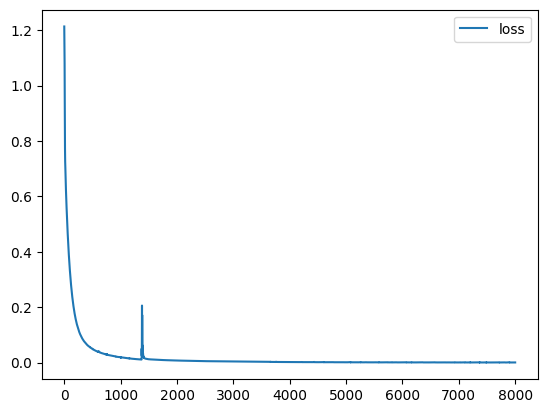

In [122]:
#grafico de los errores por epoch
errores_empiricos = pd.DataFrame(modelo_opt_sec2vec.history.history)
errores_empiricos.plot()

Scatter plot de los errores

1/1 [==============================] - 1s 751ms/step


<Axes: >

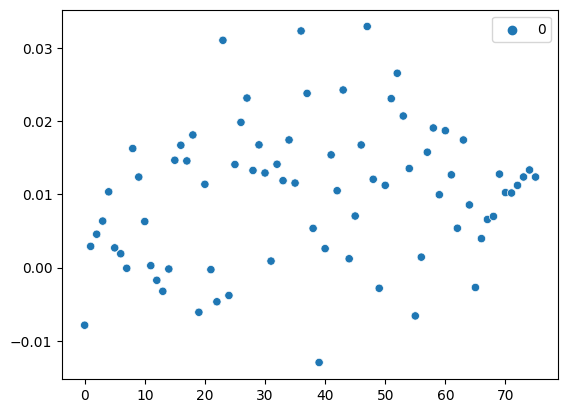

In [123]:
sns.scatterplot(pd.DataFrame((modelo_opt_sec2vec.predict(X_train) - y_train1).reshape(-1,1)))

In [124]:
#evaluamos el modelo con el conjunto de prueba
modelo_opt_sec2vec.evaluate(X_test, y_test1, batch_size = y_test1.shape[0])

1/1 [==============================] - 1s 1s/step - loss: 0.0595


0.059548765420913696

In [125]:
#comparamos con el conjunto de test
predicciones_test = []

for i in range(len(X_test)):
    #hacemos reshape primero para que tenga 3 dimensiones
    x_test = X_test[i].reshape(1, len(X_test[0]), len(X_test[0][0]))
    
    prediccion = modelo_opt_sec2vec.predict(x_test)
    
    # store prediction
    predicciones_test.append(prediccion)

1/1 [==============================] - 0s 20ms/step


In [126]:
modelo_opt_sec2vec.predict(X_test)

1/1 [==============================] - 0s 18ms/step


array([[0.8696078 , 0.90506905, 0.91077113, 0.999982  ]], dtype=float32)

In [127]:
#para sec2vec, lo ponemos en columna, tanto la predicción como el test
predicciones_test_arr = np.asarray(predicciones_test).reshape(-1,1)
test_arr = np.asarray(y_test1).reshape(-1,1)
predicciones_test_arr, test_arr

(array([[0.8696078 ],
        [0.90506905],
        [0.91077113],
        [0.999982  ]], dtype=float32),
 array([[1.06418076],
        [1.1680238 ],
        [1.20653426],
        [1.20403033]]))

In [128]:
#invertimos las transformaciones
predicciones_test_arr_inv = minMax_y.inverse_transform(predicciones_test_arr)
test_arr_inv = minMax_y.inverse_transform(test_arr)

#generamos una matriz

predicciones_test_arr_inv, test_arr_inv

(array([[ 98.70309],
        [ 99.88327],
        [100.07304],
        [103.04207]], dtype=float32),
 array([[105.17866667],
        [108.63466667],
        [109.91633333],
        [109.833     ]]))

In [129]:
#creamos un df con ambos arrays
df_pred_vs_test = pd.DataFrame(data = predicciones_test_arr_inv, 
                               columns = ["predicción"])
df_pred_vs_test["test"] = np.asarray(test_arr_inv).reshape(-1,1)

df_pred_vs_test = df_pred_vs_test.set_index(df_test.tail(4).index)
df_pred_vs_test

,predicción,test
trimestre,,
2022Q1,98.703087,105.178667
2022Q2,99.883270,108.634667
2022Q3,100.073036,109.916333
2022Q4,103.042068,109.833000


<Axes: xlabel='trimestre'>

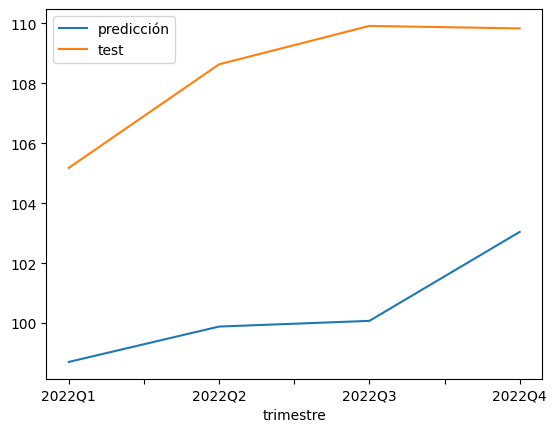

In [130]:
df_pred_vs_test.plot()

In [131]:
ipc = pd.DataFrame(df["ipc.general"])

In [132]:
ipc = ipc.join(df_pred_vs_test)

In [133]:
predicciones_train_arr_inv = minMax_y.inverse_transform(modelo_opt_sec2vec.predict(X_train).reshape(-1,1))

1/1 [==============================] - 0s 33ms/step


In [134]:
ipc.loc["2003Q1":"2021Q4","ajuste"] = predicciones_train_arr_inv
ipc.loc["2003Q1":"2021Q4", "predicción"] = predicciones_train_arr_inv

<Axes: xlabel='trimestre'>

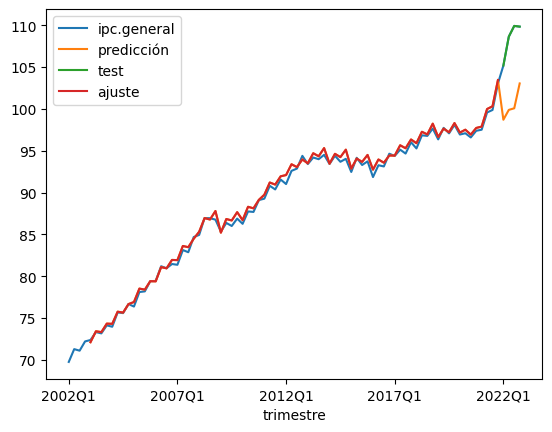

In [135]:
ipc.plot()

# Interpretabilidad

In [136]:
resultados = []
# permutamos aleatoriamente la variable K
guardar_col = X_train[:,:,0].copy()
np.random.shuffle(X_train[:,:,0])
        
# calculamos MAE con la variable K mezclada
preds = modelo_opt_sec2vec.predict(X_train, verbose=0).squeeze() 
mae = np.mean(np.abs(y_train1 - preds))
resultados.append({'variable':df.columns[0],'mae':mae})
X_train[:,:,0] = guardar_col
resultados

preds = modelo_opt_sec2vec.predict(X_train, verbose=0).squeeze()
baseline_mae = np.mean(np.abs(y_train1 - preds))
baseline_mae, resultados

(0.01140242285315822, [{'variable': 'pib.real', 'mae': 0.017127214335431382}])

Usamos el método de la permutación de variables

In [137]:
resultados_finales = []
preds = modelo_opt_sec2vec.predict(X_train, verbose=0).squeeze()
#primero calculamos la media del error absoluto
baseline_mae = np.mean(np.abs(y_train1 - preds))
resultados_finales.append({'variable':'mae base','mae':baseline_mae})           

for k in range(len(df.columns)-1): #ponemos -1 porque la última columna es la variable y 
    resultados = []

    for i in range(25):
      # permutamos aleatoriamente la variable K
      guardar_col = X_train[:,:,k].copy()
      np.random.shuffle(X_train[:,:,k])
              
      # calculamos MAE con la variable K mezclada
      preds = modelo_opt_sec2vec.predict(X_train, verbose=0).squeeze() 
      mae = np.mean(np.abs(y_train1 - preds))
      resultados.append(mae)
      X_train[:,:,k] = guardar_col

    resultados_finales.append({'variable':df.columns[k],'mae':np.mean(resultados)}) #hacemos la media


importancia_variables = pd.DataFrame(resultados_finales)
del(resultados_finales)
importancia_variables = importancia_variables.sort_values("mae")

importancia_variables.head(50)

,variable,mae
0,mae base,0.011402
15,is.act.industria,0.011655
12,saldo.caja,0.011993
6,export.energia,0.012249
13,financiacion.empresas.resid,0.012427
22,is.consumo,0.012975
8,import.sin.energia,0.013284
7,import,0.014312
5,export.sin.energia,0.015504
4,export,0.015512


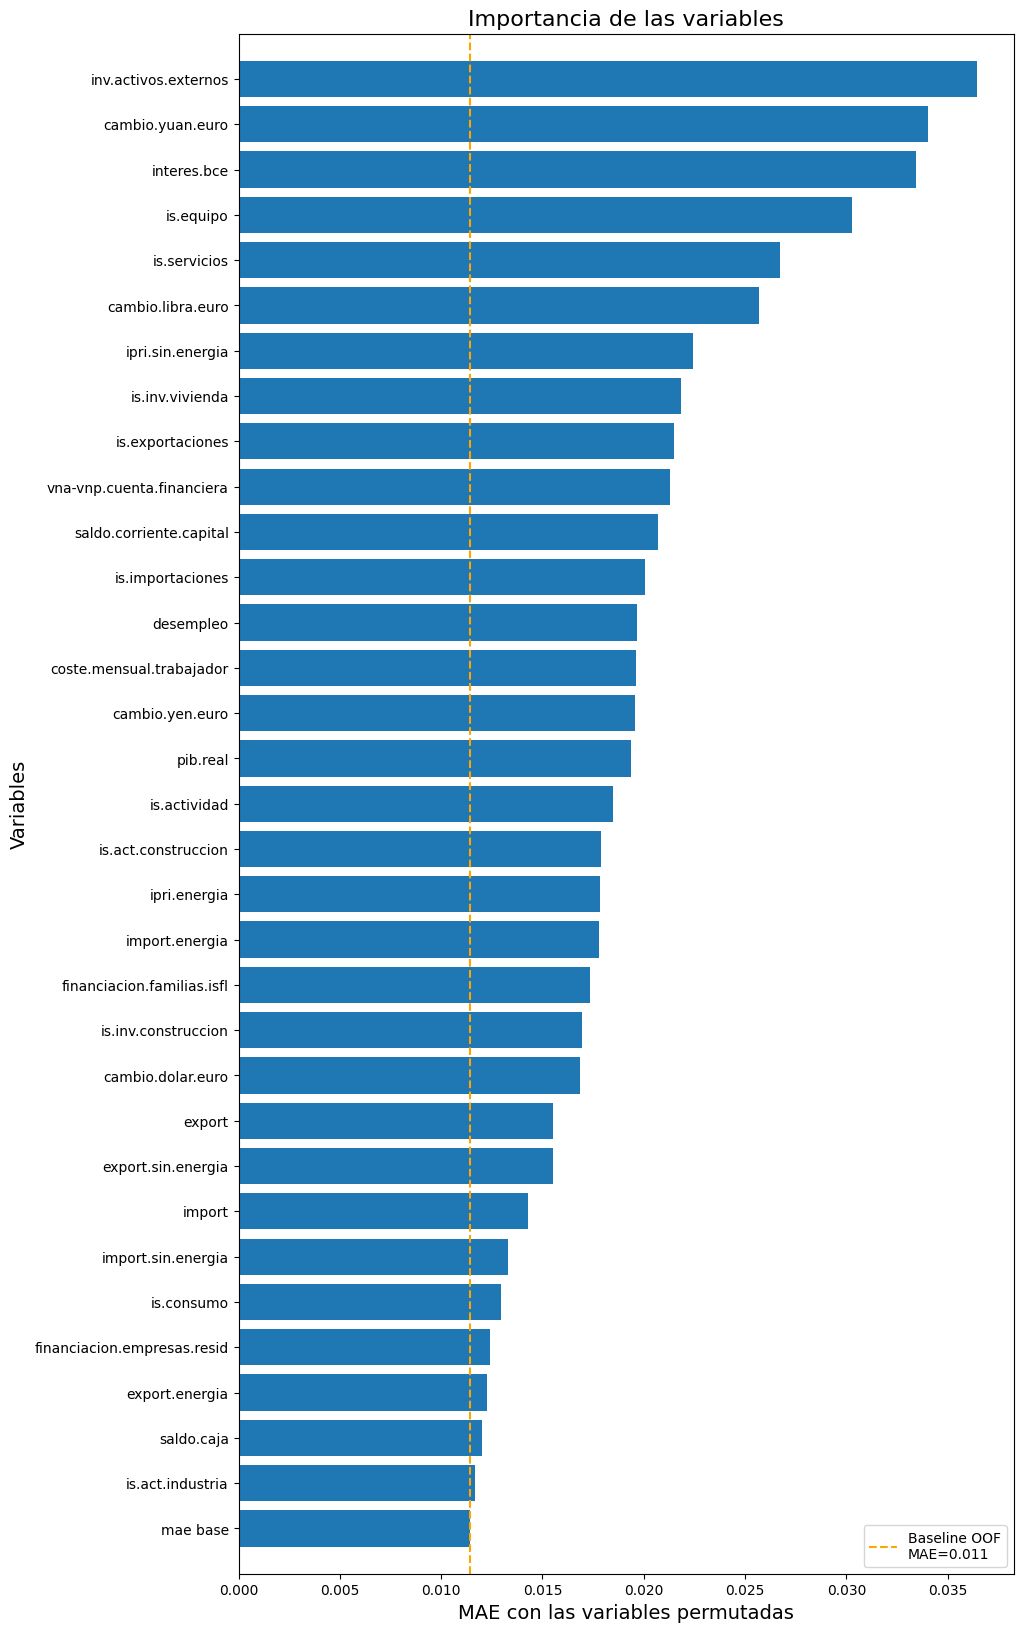

In [138]:
import matplotlib.pyplot as plt
# DISPLAY LSTM FEATURE IMPORTANCE
plt.figure(figsize=(10,20))
plt.barh(np.arange(len(df.columns[:32])+1),importancia_variables["mae"])
plt.yticks(np.arange(len(df.columns[:32])+1),importancia_variables["variable"].values)
plt.title('Importancia de las variables',size=16)
plt.ylim((-1,len(df.columns[:32])+1))
plt.plot([baseline_mae,baseline_mae],[-1,len(df.columns[:32])+1], '--', color='orange',
        label=f'Baseline OOF\nMAE={baseline_mae:.3f}')
plt.xlabel('MAE con las variables permutadas',size=14)
plt.ylabel('Variables',size=14)
plt.legend()
plt.show()